### Завдання до уроку 34

In [1]:
import plotly
import plotly.graph_objs as go
import sweetviz as sv
import ydata_profiling as yp
import openpyxl
import pandas as pd

### 1. Створюємо xlsx документ, що містить данні про міста України.

In [50]:
df=pd.read_excel('ukr_city.xlsx',sheet_name='city')
df

,name,population,salary,square,metro
0,Вінниця,369739,12555,11320,False
1,Луцк,215986,11735,4200,False
2,Дніпро,968502,14479,40970,True
3,Житомир,261624,12123,6500,False
4,Ужгород,115449,12115,4000,False
5,Запоріжжя,710052,14510,27801,False
6,Івано-Франківськ,238196,11827,8373,False
7,Київ,2952300,15152,83558,True
8,Кропивницький,219676,11658,10332,False
9,Львів,717273,12936,17101,False


#### 2. За допомогою Plotly візуалізуємо залежності населення міста від його площі та середнього доходу населення від кількості населення.

Для більшої наглядності попередньо відсортуємо DataFrame за параметром населення. 

In [51]:
df.sort_values(by=['population'], inplace=True)
df

,name,population,salary,square,metro
4,Ужгород,115449,12115,4000,False
1,Луцк,215986,11735,4200,False
8,Кропивницький,219676,11658,10332,False
15,Тернопіль,225004,11455,7200,False
6,Івано-Франківськ,238196,11827,8373,False
13,Рівне,243873,13358,6300,False
14,Суми,256474,12119,14723,False
3,Житомир,261624,12123,6500,False
20,Чернівці,264298,11326,15216,False
19,Черкаси,269836,12311,7800,False


In [54]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['population'],y=df['salary'],name='Salary'))
fig.add_trace(go.Scatter(x=df['population'],y=df['square'],name='Square'))

### 3. Будуємо матрицю кореляцій та візуалізуємо її через Heatmap.


In [55]:
df_cor=df.corr()
fig=go.Figure()
fig.add_trace(go.Heatmap(x=df_cor.columns,y=df_cor.index,z=df_cor, colorscale='Blues'))

C:\Users\Александр\AppData\Local\Temp\ipykernel_20044\2086505447.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### 4. Будуємо звіт про DataFrame за допомогою Sweetviz 

C:\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |                                             | [  0%]   00:00 ->…

C:\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning:

iteritems is dep


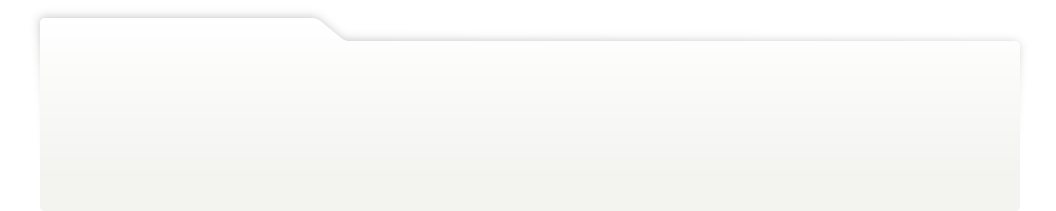
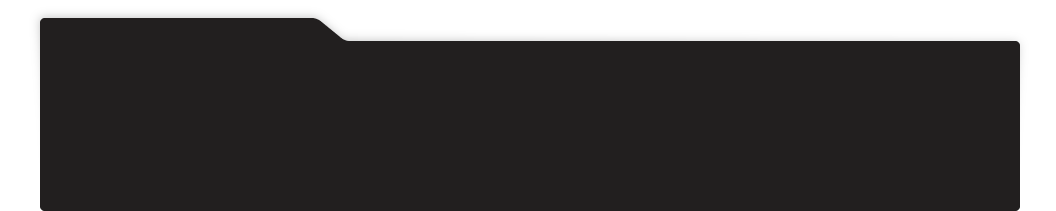
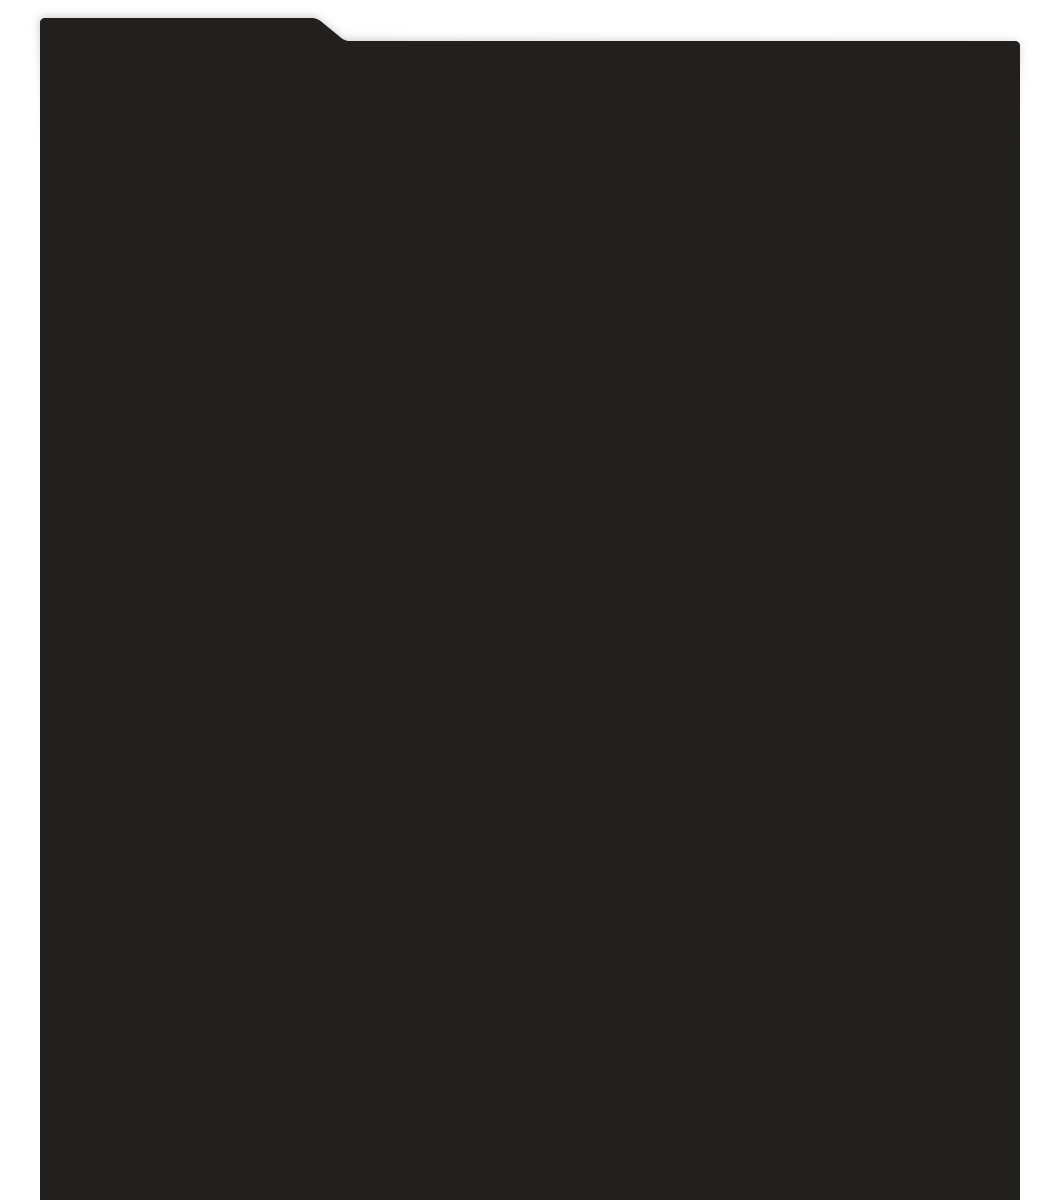
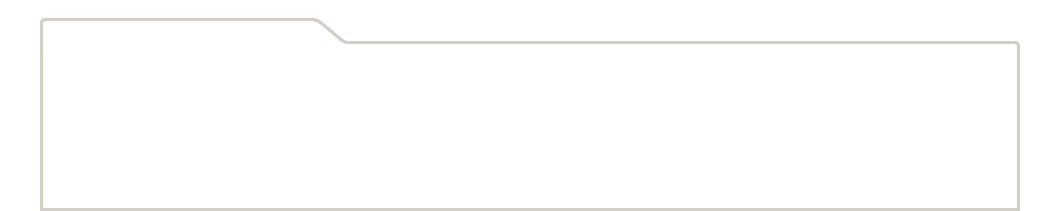
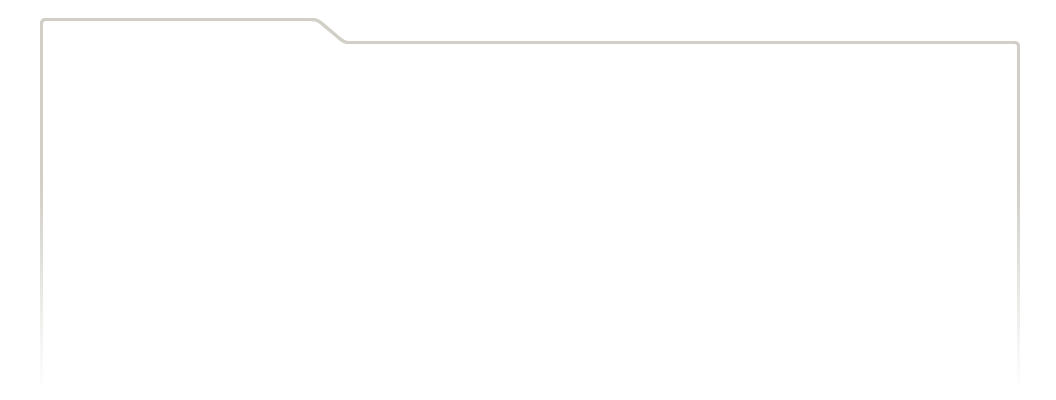
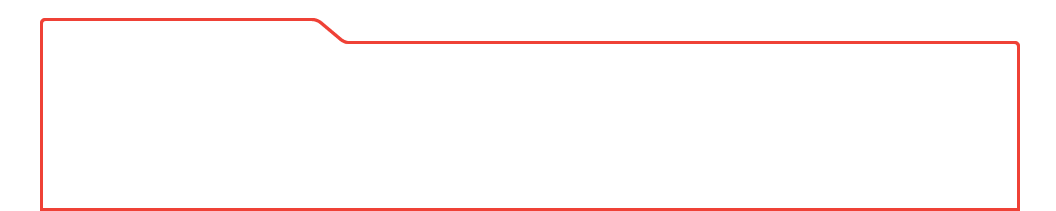
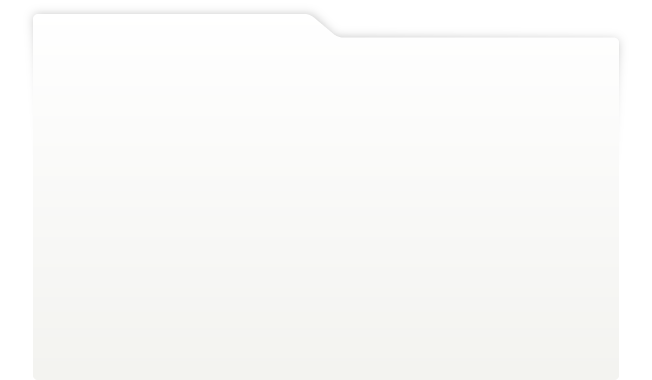
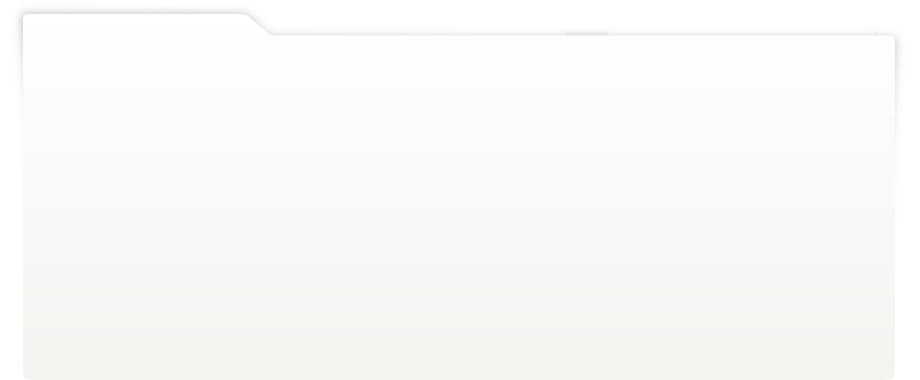
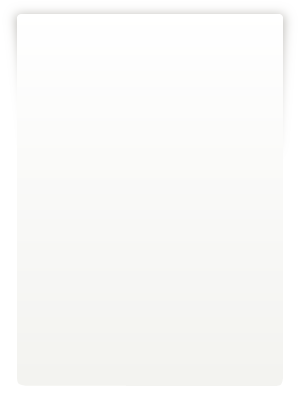
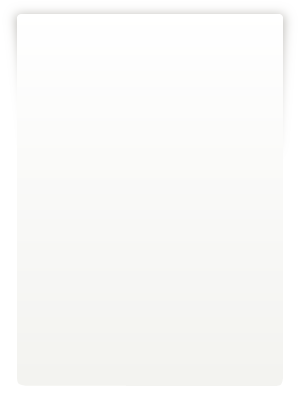
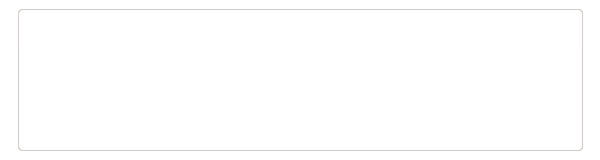
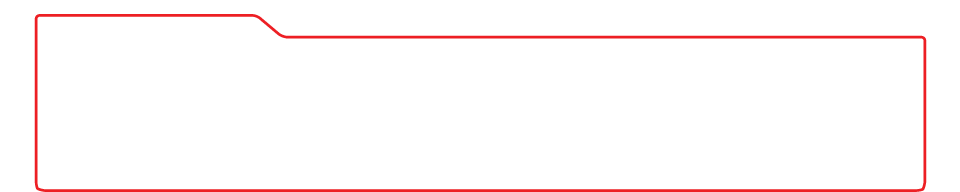
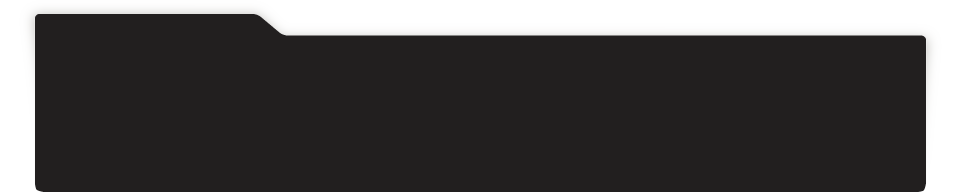
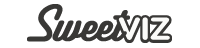
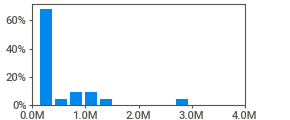
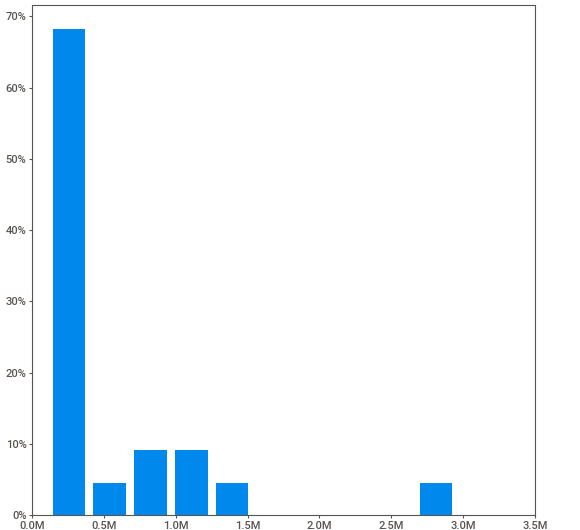
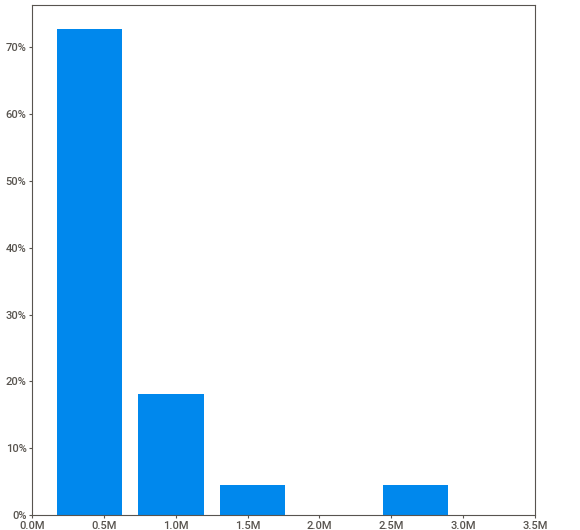
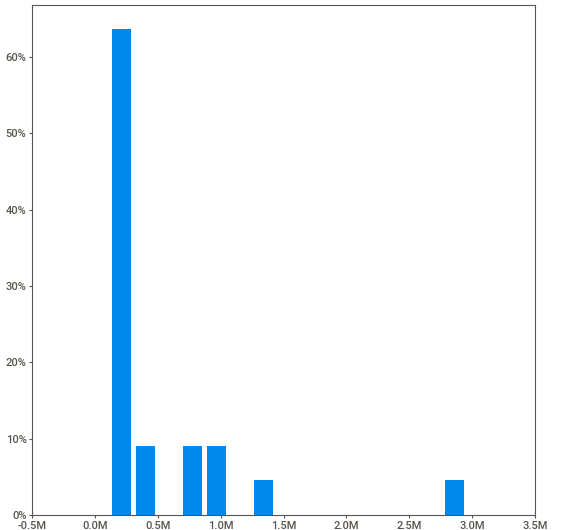
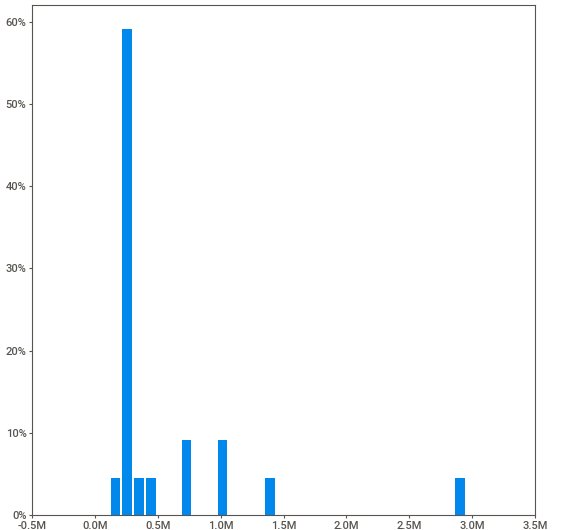
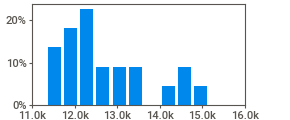
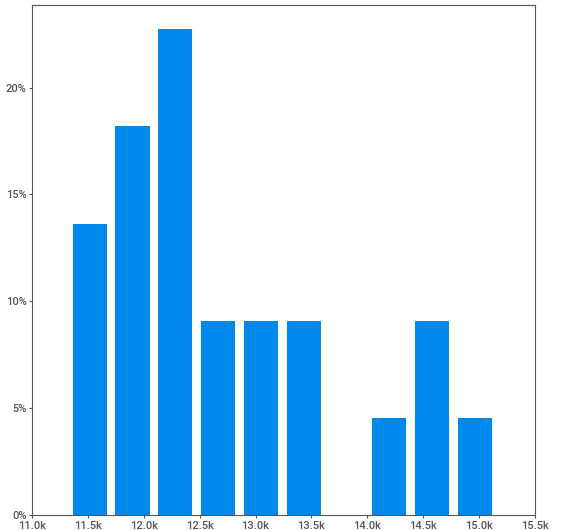
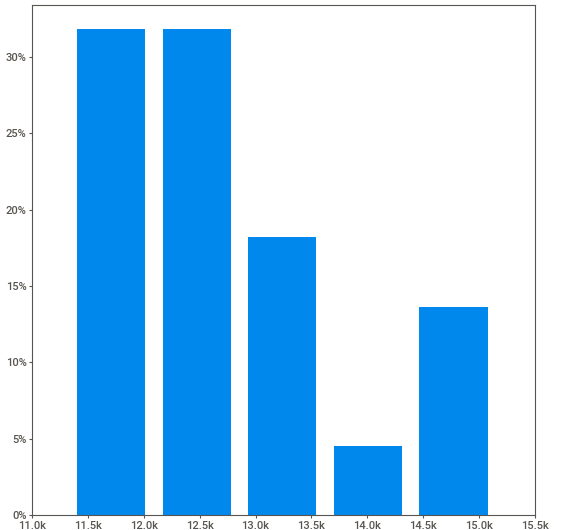
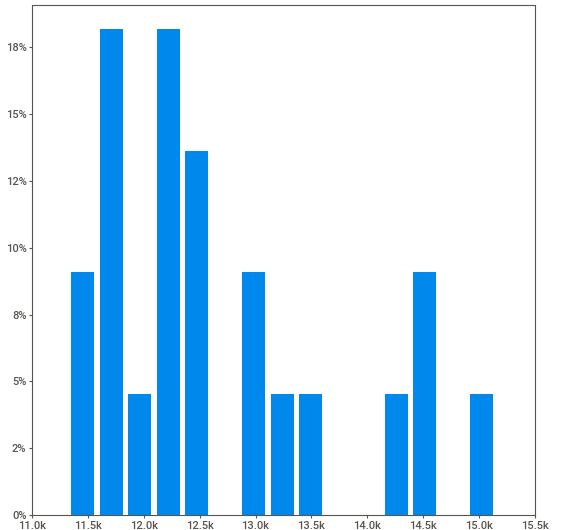
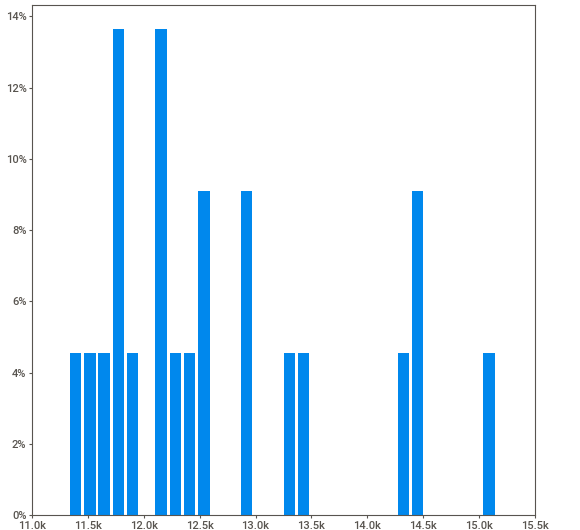
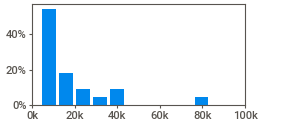
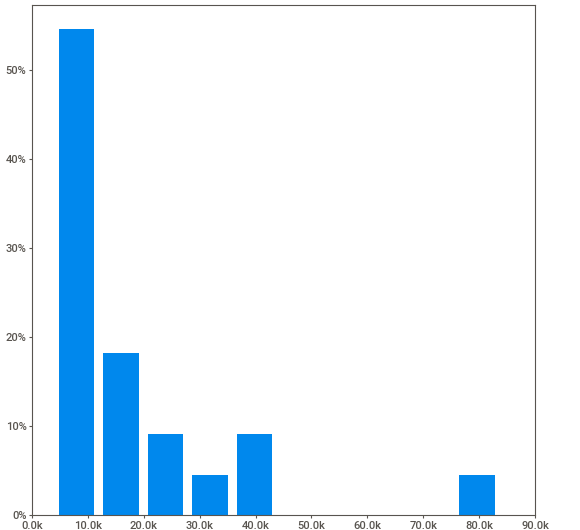
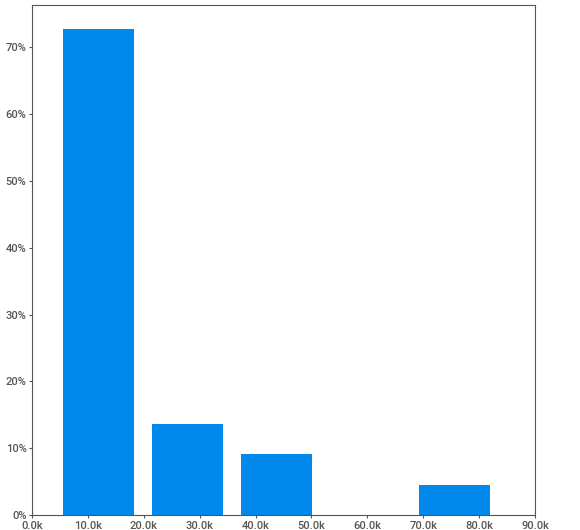
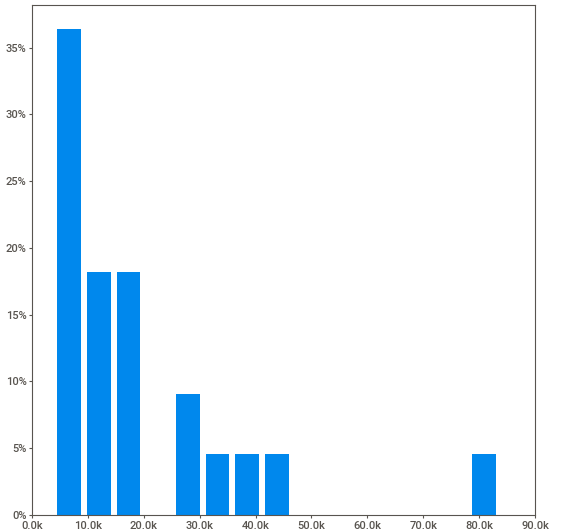
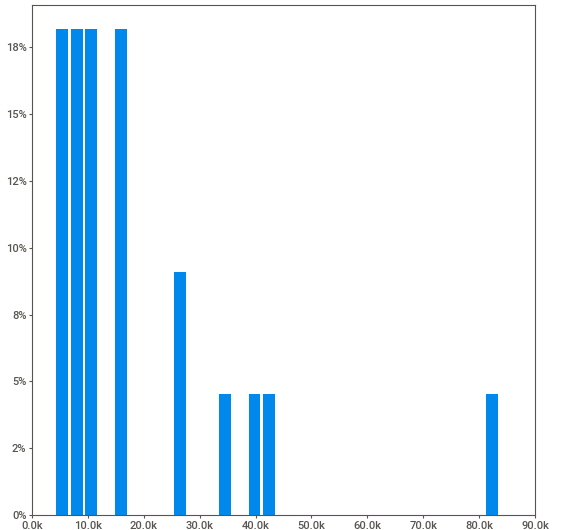
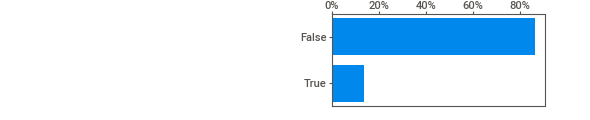
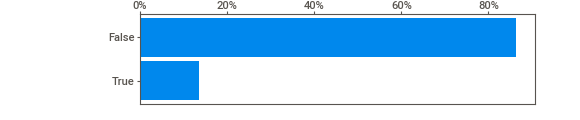
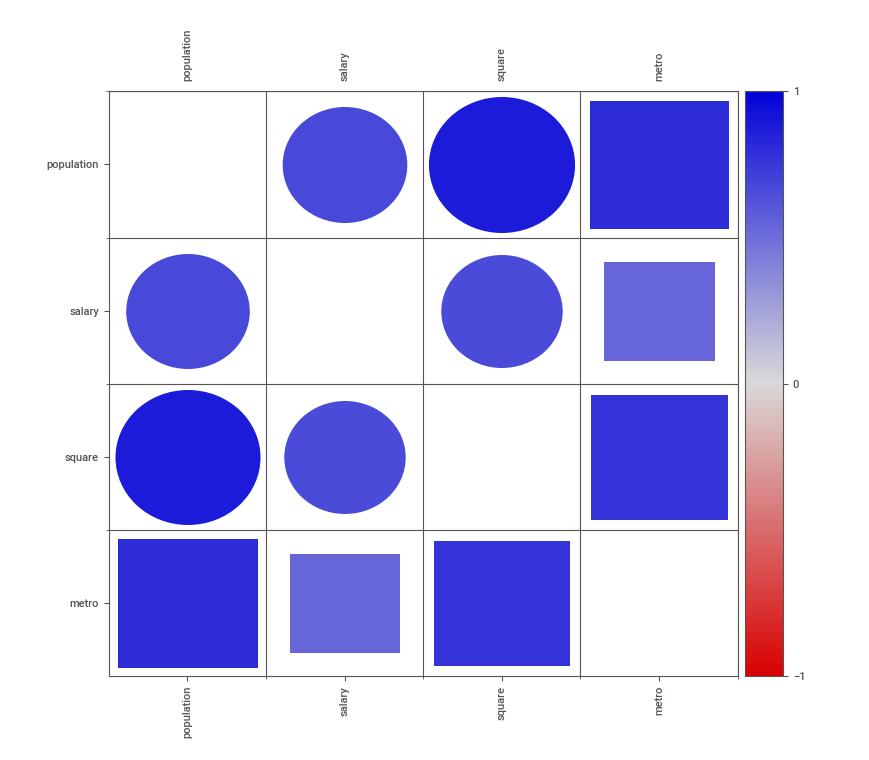
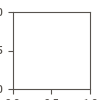

In [57]:
result=sv.analyze(df)
result.show_notebook()

### Будуємо звіт про DataFrame за допомогою Pandas Profiling

In [58]:
profil=yp.ProfileReport(df,correlations={'pearson':{'calculate':True},
                                        'spearman':{'calculate':True},
                                        'kendall':{'calculate':True},
                                        'phi_k':{'calculate':True},})
profil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Порівняння результатів

На мій погляд звіт створений у Pandas Profiling більш інформативний та зручний ніж звіт створений за допомогою Sweetviz.
1. Pandas Profiling розраховує та створює 4 різних кореляційних матриці у Sweetviz тільки кореляція Пірсона.
2. Sweetviz проводить дуже грубе округлення всіх результатів, за рахунок чого вони менш наглядні ніж у Pandas Profiling.
3. Pandas Profiling проводить аналіз навіть стовбчиків із текстовими данними (назви міст).
4. У Pandas Profiling дуже зручно реалізована опція Interactions, яка малює графіки залежностей між усіма даними DataFrame.
5. Pandas Profiling має більше статистичних даних.
6. У Pandas Profiling є дуже зручна опція Alerts.